# Make training images to binary

Make hand made training images with white roots to black and white

### Import libraries

In [1]:
from matplotlib import pyplot as plt
from skimage import exposure, measure
import numpy as np
import cv2

### Remove isolated pixels that have size less than thershold

In [2]:
def remove_isolated_pixels(thresh, min_size):
    # Perform a connected component analysis on the thresholded
    # image and remove components that have size less than thershold
    labels = measure.label(thresh, connectivity=2, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    # loop over the unique components
    for label in np.unique(labels):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels 
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if (numPixels > min_size):
            mask = cv2.add(mask, labelMask)
            
    # Return cleaned mask
    return mask

### Print light and edge areas as binary masks

Expects read image to end as "-mask_raw.jpg" and saves new image with end "-mask.jpg"


In [3]:
# Read color image
image_name = "hydescan1_T001_L001_2018.09.26_033029_071_DYY-mask_raw.jpg"
im_color = cv2.imread(image_name, 1)

# Threshold by each channel. Remove pixels less than threshold in any of channels ( channels: B, R, G).
mask = cv2.inRange(im_color, (254, 254, 254), (255, 255,255))

# Threshold mask. Values less than threshold to 255. Picture has no values than threshold in last step.
mask = cv2.threshold(mask, 250, 255, cv2.THRESH_BINARY)[1]

# "Make areas fatter by 1 pixel (join roots where is tiny holes)
mask = cv2.dilate(mask, None, iterations=1)

# Remove small noise pixels from mask (Min size setting needs adjusting!!!)
mask = remove_isolated_pixels(mask, min_size=100)

# Save mask
save_name = image_name.split('-mask_raw.jpg')[0]+'-mask.jpg'
cv2.imwrite(save_name, mask)

True

### Show original image as grayscale

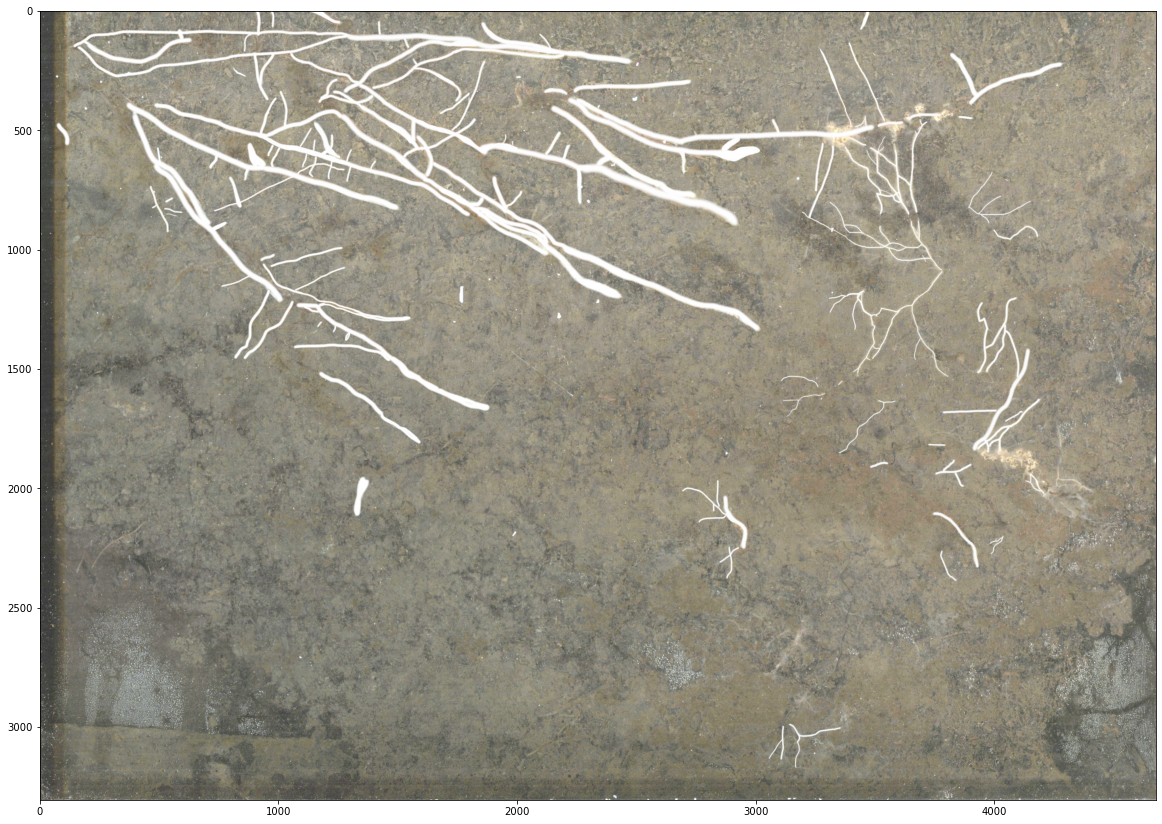

In [4]:
# BRG to RGB
im_color = cv2.cvtColor(im_color, cv2.COLOR_BGR2RGB)

# Show image
plt.figure(figsize=(20, 20))
plt.imshow(np.abs(im_color), cmap = 'gray')
plt.show()

### Show result image

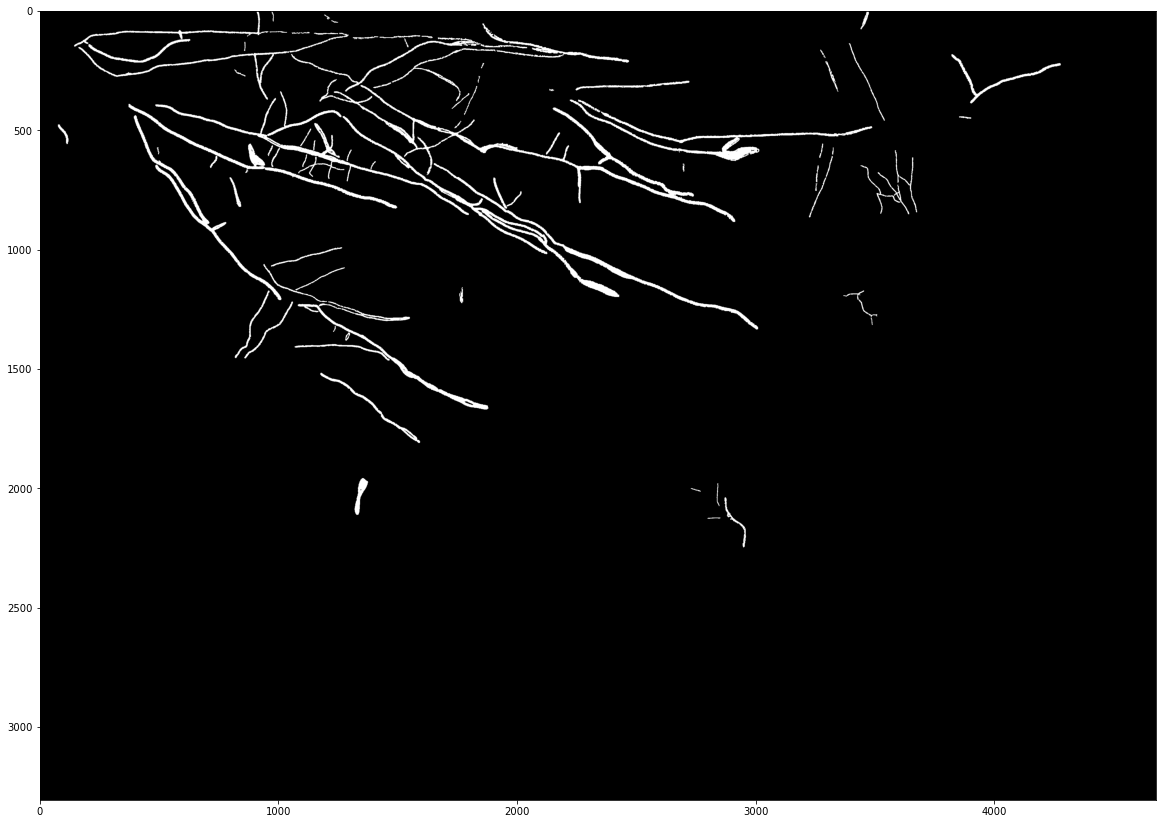

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(np.abs(mask), cmap = 'gray')
plt.show()